# 01 - Introdução a SuperComputação

Como vimos na expositiva, uma solução de alto desempenho depende de três partes:

1. algoritmos eficientes
2. implementações eficientes
3. paralelismo

Na atividade de hoje vamos estudar o primeiro ponto e quantificar o efeito de algoritmos eficientes na resolução de um problema complexo. 

## Problemas estudados em SuperComputação

Em Desafios de Programação conhecemos a classe dos problemas NP-completo, que são aqueles que acreditamos não existir nenhum algoritmo determinístico que os resolvem em tempo polinomial. Ou seja, são problemas importantes cuja solução é difícil. Em geral temos classes de algoritmos para resolvê-los:

1. ótimos globais: algoritmo que encontra a solução "correta" do problema. 
2. ótimos locais: algoritmo que encontra uma solução "boa" e que não pode ser melhorada por pequenas modificações. 
3. aproximação: algoritmos que garantem estar "perto o suficiente" da solução ótima. Este tipo de algoritmo não nos interessa em SuperComputação.

Iremos analisar hoje 4 executáveis que resolvem o problema do [Caixeiro Viajante](https://en.wikipedia.org/wiki/Travelling_salesman_problem). 

1. `busca-local-1` - implementação de um método de busca rápida, porém não ótima.
1. `busca-local-1-par` - implementação paralela do programa acima.
2. `busca-local-2` - implementação alternativa do mesmo método acima. Os resultados de ambos são idênticos.
2. `busca-local-2-par` - implementação paralela do programa acima.

!!! important 
    Não estamos interessados no Caixeiro Viajante em si hoje. Queremos é comparar diferentes maneiras de resolvê-lo para entendermos o papel de técnicas de SuperComputação na velocidade de processamento e nos resultados obtidos. 


## Ferramental

Realizar testes de maneira automatizada é muito importante para quantificar os efeitos de diferentes algoritmos e técnicas de paralelismo. O snippet abaixo executa 

In [1]:
import subprocess
import time

with open('entradas-busca-local/in-0.txt') as f:
    start = time.perf_counter()
    proc = subprocess.run(['./busca-local-1'], input=f.read(), text=True, capture_output=True)
    end = time.perf_counter()

    print('Saída:', proc.stdout)
    print('Stderr:', proc.stderr)
    print('Tempo total(s):', end - start)

Saída: 232.234 0
3 0 4 1 2 

Stderr: 
Tempo total(s): 0.01623154099999624


Vamos agora praticar usar este snippet para executar nossos testes automaticamente. 

!!! example

    Crie uma função `roda_com_entrada(executavel, arquivo_in)` que roda o primeiro argumento usando como entrada o conteúdo do segundo argumento. Teste seu código com o executável `busca-local-1` e com o arquivo de entrada `in-0.txt` usado no exemplo acima.

    Sua função deverá devolver uma tupla `(stdout,time)` com `stdout` sendo a saída do programa e `time` seu tempo de execução em segundos. 

In [2]:
# TODO: exercício aqui
def roda_com_entrada(executavel, arquivo_in):
    with open(f'entradas-busca-local/{arquivo_in}') as f:
        start = time.perf_counter()
        proc = subprocess.run([f'./{executavel}'], input=f.read(), text=True, capture_output=True)
        end = time.perf_counter()
        tempo = end - start
    
    return (proc.stdout, tempo)

## Algoritmos sequenciais

Com esse código, vamos criar um relatório interativo que roda nossos testes automaticamente e já plota informações prontas para nossas análises. Vamos começar examinando o desempenho do executável `busca-local-1`.

Rode o `busca-local` com os arquivos de entrada na pasta `entradas-busca-local`. Guarde os tempos em uma lista.

Leia o tamanho das entradas dos arquivos  na pasta `entradas-busca-local` e guarde em uma segunda lista.
 
Plote o tempo de execução pelo tamanho da entrada usando `matplotlib`

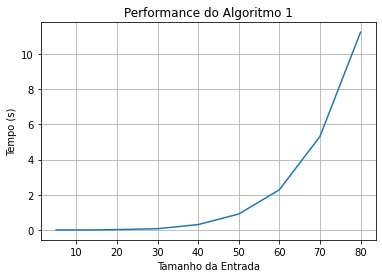

In [9]:
# TODO: exercício aqui
import os
import matplotlib.pyplot as plt

tempos1 = []
tamanhos1 = []

for file in os.listdir("entradas-busca-local/"):
    tempos1.append(roda_com_entrada("busca-local-1", file)[1])
    with open(f"entradas-busca-local/{file}", "r") as f:
        tamanhos1.append(int(f.readline()))
        
tempos1 = [x for x, _ in sorted(zip(tempos1, tamanhos1))]
tamanhos1 = sorted(tamanhos1)
        
plt.plot(tamanhos1, tempos1)
plt.xlabel("Tamanho da Entrada")
plt.ylabel("Tempo (s)")
plt.grid(True)
plt.title("Performance do Algoritmo 1")
plt.show()

Repita os três passos acima para o executável `busca-local-2`. Finalize plotando os tempos de execução de ambos os executáveis no mesmo gráfico.

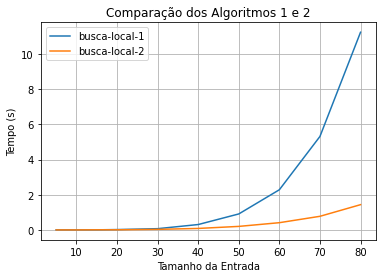

In [10]:
#TODO: seu código aqui
tempos2 = []
tamanhos2 = []

for file in os.listdir("entradas-busca-local/"):
    tempos2.append(roda_com_entrada("busca-local-2", file)[1])
    with open(f"entradas-busca-local/{file}", "r") as f:
        tamanhos2.append(int(f.readline()))
        
tempos2 = [x for x, _ in sorted(zip(tempos2, tamanhos2))]
tamanhos2 = sorted(tamanhos2)
    
plt.plot(tamanhos1, tempos1, label="busca-local-1")
plt.plot(tamanhos2, tempos2, label="busca-local-2")
plt.xlabel("Tamanho da Entrada")
plt.ylabel("Tempo (s)")
plt.grid(True)
plt.title("Comparação dos Algoritmos 1 e 2")
plt.legend()
plt.show()

Segundo uma coleta de dados informal e altamente confiável, 93,17% dos alunos não colocam legendas nem títulos nos gráficos gerados. Faça isso agora. 

Interprete o gráfico que você gerou na linha de cima. 

**R:** O algoritmo 2 é muito mais eficiente do que o algoritmo 1. Portanto, ele apresenta uma queda de performance muito menor conforme o tamanho da entrada aumenta.

Compare manualmente a saída dos programas. Existe diferença em seus resultados?

**R:** Não, os programas fornecem as mesmas saídas.

Resgate seus conhecimentos de Desafios de Programação e explique a diferença entre os algoritmos.

**R:** A diferença entre eles é a complexidade de cada programa. O algoritmo 1 possui uma complexidade maior do que o algoritmo 2. Assim, o algoritmo 1 acaba demorando mais tempo para realizar a mesma tarefa. Ou seja, o programa 2 é mais otimizado para o problema em questão.


## Algoritmos paralelos

Na discussão inicial da expositiva chegamos à conclusão de que se conseguimos realizar *N* operações em paralelo teremos um ganho de no máximo *N* vezes no desempenho de nosso programa. Nesta parte iremos estudar esta afirmação usando implementações paralelas dos algoritmos da seção anterior. 

Execute os algoritmos paralelos com as mesmas entradas e compare com suas versões paralelas. Use um gráfico para facilitar as comparações

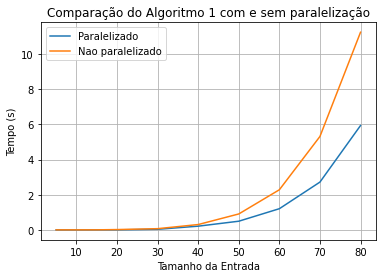

In [11]:
tempos1par = []
tamanhos1par = []

for file in os.listdir("entradas-busca-local/"):
    tempos1par.append(roda_com_entrada("busca-local-1-par", file)[1])
    with open(f"entradas-busca-local/{file}", "r") as f:
        tamanhos1par.append(int(f.readline()))
        
tempos1par = [x for x, _ in sorted(zip(tempos1par, tamanhos1par))]
tamanhos1par = sorted(tamanhos1par)
        
plt.plot(tamanhos1par, tempos1par, label="Paralelizado")
plt.plot(tamanhos1, tempos1, label="Nao paralelizado")
plt.xlabel("Tamanho da Entrada")
plt.ylabel("Tempo (s)")
plt.grid(True)
plt.legend()
plt.title("Comparação do Algoritmo 1 com e sem paralelização")
plt.show()

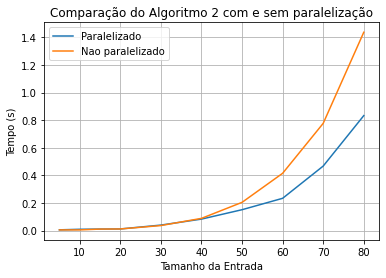

In [14]:
tempos2par = []
tamanhos2par = []

for file in os.listdir("entradas-busca-local/"):
    tempos2par.append(roda_com_entrada("busca-local-2-par", file)[1])
    with open(f"entradas-busca-local/{file}", "r") as f:
        tamanhos2par.append(int(f.readline()))
        
tempos2par = [x for x, _ in sorted(zip(tempos2par, tamanhos2par))]
tamanhos2par = sorted(tamanhos2par)
        
plt.plot(tamanhos2par, tempos2par, label="Paralelizado")
plt.plot(tamanhos2, tempos2, label="Nao paralelizado")
plt.xlabel("Tamanho da Entrada")
plt.ylabel("Tempo (s)")
plt.grid(True)
plt.legend()
plt.title("Comparação do Algoritmo 2 com e sem paralelização")
plt.show()

Compare os tempos obtidos. Qual foi o ganho médio? Quantos *núcleos* a máquina que você está usando possui? Responda comparando cada algoritmo sequencial com sua versão paralela.

**R:** Conforme o tamanho da entrada aumenta os algoritmos paralelizados parecem demorar metade do tempo em comparação com o não paralelizado. Ou seja, há um ganho médio de 50%. A máquina máquina virtual que estou utilizando possui 2 *núcleos* a sua disposição.

Já estabelecemos que `busca-local-2` é melhor que `busca-local-1` por ser utilizar um algoritmo mais eficiente e vimos na prática a diferença entre um algoritmo $O(n^3)$ e um algoritmo $O(n^2)$. Vamos agora examinar a seguinte questão.

"É possível usar paralelismo para tornar `busca-local-1-par` melhor que `busca-local-2`?"

Compare o desempenho de `busca-local-1-par` com `busca-local-2`. Faça um gráfico

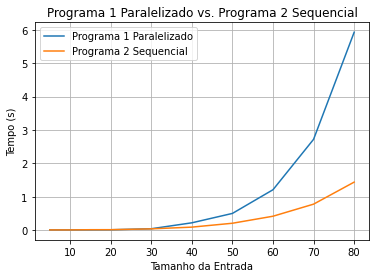

In [15]:
plt.plot(tamanhos1par, tempos1par, label="Programa 1 Paralelizado")
plt.plot(tamanhos2, tempos2, label="Programa 2 Sequencial")
plt.xlabel("Tamanho da Entrada")
plt.ylabel("Tempo (s)")
plt.grid(True)
plt.legend()
plt.title("Programa 1 Paralelizado vs. Programa 2 Sequencial")
plt.show()

Com base em seu gráfico acima, responda a pergunta: "É possível usar paralelismo para tornar busca-local-1-par melhor que busca-local-2?"

**R:** Com apenas 2 *núcleos* a disposição isso não é possível. Rapidamente a maior complexidade do busca-local-1-par faz com que ele demore mais do que o busca-local-2.

Vamos agora generalizar a pergunta:

Dados dois algoritmos com complexidades computacionais diferentes, sendo que o primeiro é inferior ao segundo. É possível usar paralelismo para tornar o primeiro mais rápido que o segundo para todos tamanhos de entrada? Assuma que você possui um número fixo de *núcleos*. 

**R:** Não. Sempre vai existir um tamanho de entrada que faz com que o algoritmo 2 seja mais rápido que o algoritmo 1. Isso ocorre mesmo que haja uma paralelização distribuída entre muitos núcleos.
